# Pràctica amb ordinador 4. Filogènia mitocondrial d'hominins moderns i arcaics
## Preparació de l'ordinador
En esta pràctica utilitzarem els paquets `phangorn` i `Biostrings`. Si no estan intal·lats al teu ordinador, executa les ordres següents en un terminal:

> `install.packages('phangorn')`

> `install.packages('BiocManager')`

> `BiocManager::install('Biostrings')`

I a continuació, carrega'ls:

In [2]:
suppressMessages(library('phangorn'))
suppressMessages(library('Biostrings'))

## Introducció
Al web [http://www.phylotree.org](http://www.phylotree.org) s'acumulen més de 24000 seqüències completes d'ADN mitocondrial humà. Tota la diversitat genètica mitocondrial de les poblacions humanes actuals pot classificar-se en uns pocs haplotips principals, la filogènia dels quals es reprodueix a la figura següent:

![](phylotree.png)

L'objectiu d'aquesta pràctica és utilitzar dades d'ADN mitocondrial per estudiar les relacions filogenètiques entre humans actuals i alguns dels nostres parents més pròxims, com els neandertals i els denisovans. A més, aplicarem la teoria de la coalescència a les dades per extreure informació sobre les diferents poblacions d'hominins.

Les dades es troben a l'arxiu `Denisovan_mtDNA.fasta` i són un alineament dels cromosomes mitocondrials complets de 9 humans moderns, 23 neandertals, 4 denisovans, un *Homo heidelbergensis*, 4 bonobos (*Pan paniscus*), 4 ximpanzés (*Pan troglodytes*) i un goril·la (que ens servirà d'*outgroup*).

## Reconstrucció filogenètica i calibratge del rellotge molecular
Igual que en la pràctica anterior, el bloc de codi següent carrega l'alineament en la sessió de treball i reconstrueix l'arbre filogenètic amb el mètode del *neighbor-joining*.

[1] 7.00151e-09

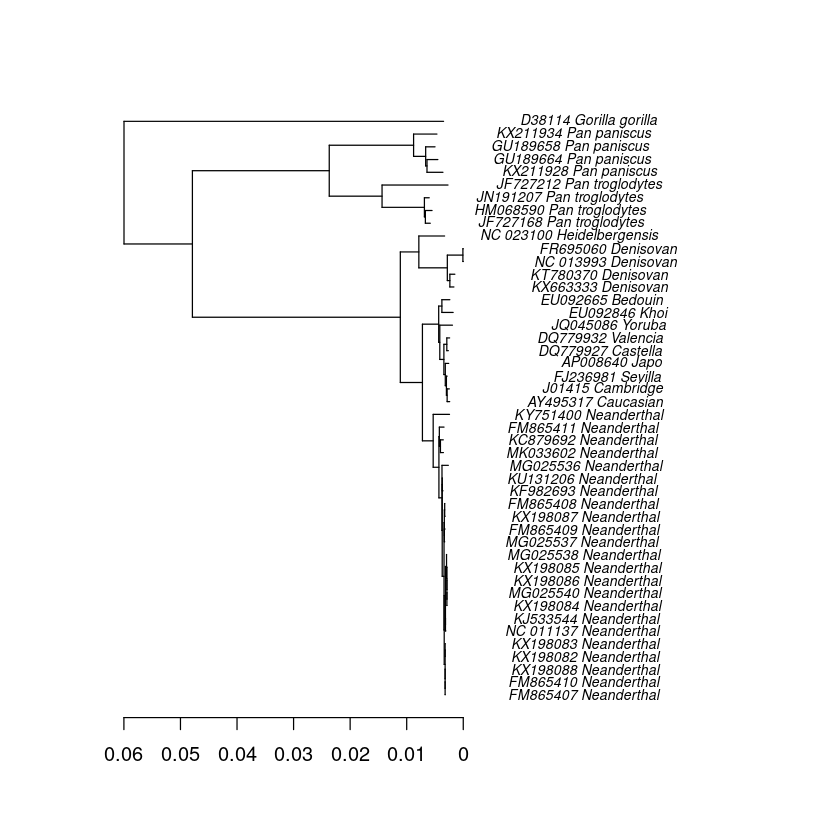

In [15]:
mtDNA  <- readDNAStringSet('mtDNA.fasta')
mtDNAb <- as.DNAbin(mtDNA)
D <- dist.dna(mtDNAb, model = 'K81')
arbre <- NJ(D)
arbre <- root(arbre, outgroup = 'D38114_Gorilla_gorilla', resolve.root = TRUE)
tipDates <- rep(0, 46)
tipDates[c(5:8,10,20:42)] <- -40000
arbre <- rtt(arbre, tip.dates = tipDates, objective = 'rms')
plot(arbre, cex = 0.7, adj = 1)
axisPhylo()
nodeDates <- rep(NA, 91)
nodeDates[1:46] <- tipDates
nodeDates[48] <- -6500000
z <- estimate.dates(arbre, node.dates = nodeDates)
mu <- estimate.mu(arbre, node.dates = z)
mu

## Mida poblacional efectiva

## Taxa de mutació mitocondrial

# Bibliografia
